## Saturation modelling from core analysis data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import warnings
warnings.filterwarnings("ignore", category=pd.errors.SettingWithCopyWarning)


In [3]:
data = pd.read_csv('/content/Geoprovider_1240Wells_OnlySandstone_Cleaned (2).csv')

data

,Well Name,Measured Depth,porosity,Sw,permh_klinken,permv_klinken,grain_density,clean lithology,rounding,sorting,cement,sed structures,log_kv,log_kh
0,15_12-10S,3427.5,0.0360,0.9440,0.962,2.940,2.63,Sandstone,subangular,well sorted,well cemented,lamina (-tions -ated) fissile,0.468347,-0.016825
1,15_12-10S,3429.5,0.0768,0.8070,0.105,0.176,2.63,Sandstone,subangular,well sorted,well cemented,Unidentified,-0.754487,-0.978811
2,15_12-10S,3430.5,0.1040,0.6700,0.124,0.056,2.63,Sandstone,subangular,well sorted,well cemented,lamina (-tions -ated),-1.251812,-0.906578
3,15_12-10S,3434.5,0.1510,0.8380,0.168,0.150,2.63,Sandstone,subangular,well sorted,well cemented,lamina (-tions -ated),-0.823909,-0.774691
4,15_12-10S,3437.5,0.0950,0.0700,0.050,0.049,2.65,Sandstone,subangular,well sorted,well cemented,Unidentified,-1.309804,-1.301030
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9223,9_2-8S,5921.0,0.1820,0.6085,4.750,1.400,2.65,Sandstone,Unidentified,well sorted,well cemented,increasing lens lenticular,0.146128,0.676694
9224,9_2-8S,5922.0,0.1860,0.5902,18.400,2.490,2.65,Sandstone,Unidentified,well sorted,well cemented,Unidentified,0.396199,1.264818
9225,9_2-8S,5923.0,0.1680,0.6637,2.880,2.110,2.62,Sandstone,Unidentified,well sorted,well cemented,increasing lens lenticular,0.324282,0.459392
9226,9_2-8S,5924.0,0.1560,0.6123,0.828,0.833,2.60,Sandstone,Unidentified,well sorted,well cemented,increasing lens lenticular,-0.079355,-0.081970


In [4]:
data.columns

Index(['Well Name', 'Measured Depth', 'porosity', 'Sw', 'permh_klinken',
       'permv_klinken', 'grain_density', 'clean lithology', 'rounding',
       'sorting', 'cement', 'sed structures', 'log_kv', 'log_kh'],
      dtype='object')

In [5]:
data['Well Name'].unique()

array(['15_12-10S', '15_12-11S', '15_12-9_S', '15_3-8', '15_5-7',
       '15_6-8A', '15_9-19S', '15_9-A-21', '15_9-A-23_A', '15_9-B-4T2',
       '15_9-D-3H', '15_9-E-4_H', '16_2-12', '16_3-4 A', '2_1-A-12',
       '2_4-21 T2', '2_5-10', '2_7-29', '2_7-D-06', '24_6-2', '25_11-16',
       '25_11-21S', '25_11-27', '25_1-9', '25_7-3', '25_8-4', '25_8-7',
       '25_8-8_S', '30_2-3', '30_3-4', '30_3-7S', '30_3-A1', '30_3-A11',
       '30_3-A12', '30_3-A-13', '30_3-A14', '30_3-A19', '30_3-A2',
       '30_3-A-20', '30_3-A3', '30_3-A-4', '30_3-A6-A-', '30_3-A7',
       '30_3-A-7_A', '30_5-2', '30_6-24S', '30_8-3', '30_9-14',
       '31_2-17SA', '31_2-18', '31_2-G-4H', '31_2-M-41', '31_2-N-11 AH',
       '31_4-10', '31_4A23', '31_5-4S', '31_5-J-41', '33_12-7',
       '33_12-B-16A', '33_6-1', '33_9-12', '33_9-14', '33_9-15',
       '33_9-16', '33_9-17', '33_9-18', '33_9-18A', '33_9-19S',
       '34_10-33', '34_10-35', '34_10-36', '34_10-37', '34_10-37A',
       '34_10-38S', '34_10-A-21', '34_10-

## Filter outlier data

Filter data of well 34_8-4S

In [6]:
wellname = '34_8-4S' # 34_11-3

In [7]:
# Define what columns to remove outlier
df_well = data[data['Well Name']==wellname].reset_index(drop=True)
df_well

,Well Name,Measured Depth,porosity,Sw,permh_klinken,permv_klinken,grain_density,clean lithology,rounding,sorting,cement,sed structures,log_kv,log_kh
0,34_8-4S,3005.50,0.232,0.362,44.400,18.900,2.67,Sandstone,subangular,well sorted,well cemented,Unidentified,1.276462,1.647383
1,34_8-4S,3006.50,0.185,0.299,1.110,36.500,2.79,Sandstone,subangular,well sorted,well cemented,Unidentified,1.562293,0.045323
2,34_8-4S,3007.50,0.144,0.403,0.464,0.141,2.77,Sandstone,subangular,well sorted,well cemented,Unidentified,-0.850781,-0.333482
3,34_8-4S,3008.25,0.265,0.147,503.000,8.610,2.65,Sandstone,subangular,well sorted,well cemented,Unidentified,0.935003,2.701568
4,34_8-4S,3009.50,0.291,0.218,137.000,552.000,2.65,Sandstone,subangular,well sorted,well cemented,Unidentified,2.741939,2.136721
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233,34_8-4S,4066.50,0.137,0.691,0.260,0.966,2.66,Sandstone,subangular,well sorted,well cemented,Unidentified,-0.015023,-0.585027
234,34_8-4S,4067.50,0.161,0.638,2.370,1.920,2.64,Sandstone,subangular,well sorted,well cemented,Unidentified,0.283301,0.374748
235,34_8-4S,4068.50,0.163,0.639,2.150,1.980,2.64,Sandstone,subangular,well sorted,well cemented,Unidentified,0.296665,0.332438
236,34_8-4S,4069.45,0.164,0.643,1.760,2.430,2.65,Sandstone,subangular,well sorted,well cemented,Unidentified,0.385606,0.245513


In [8]:
# Select columns
df_selected = df_well[['porosity', 'permv_klinken']]

df_selected

,porosity,permv_klinken
0,0.232,18.900
1,0.185,36.500
2,0.144,0.141
3,0.265,8.610
4,0.291,552.000
...,...,...
233,0.137,0.966
234,0.161,1.920
235,0.163,1.980
236,0.164,2.430


In [9]:
# Convert k to log k
df_selected['permv_klinken'] = np.log(df_selected['permv_klinken'].values)

df_selected

,porosity,permv_klinken
0,0.232,2.939162
1,0.185,3.597312
2,0.144,-1.958995
3,0.265,2.152924
4,0.291,6.313548
...,...,...
233,0.137,-0.034591
234,0.161,0.652325
235,0.163,0.683097
236,0.164,0.887891


Text(0.5, 1.0, '34_8-4S')

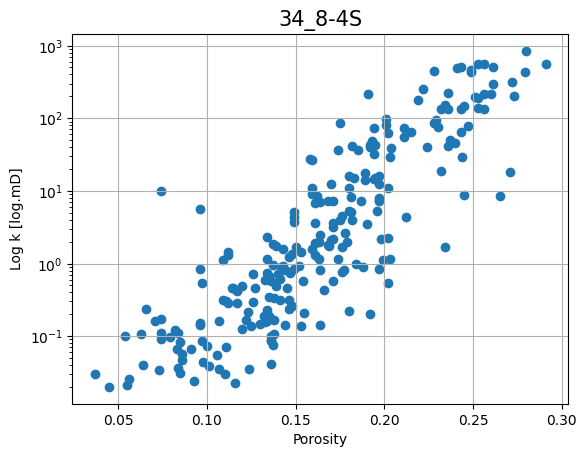

In [10]:
plt.scatter(df_well.porosity, df_well.permv_klinken)
plt.yscale('log')
plt.xlabel('Porosity')
plt.ylabel('Log k [log.mD]')
plt.grid()
plt.title(wellname, fontsize=15)

In [11]:
from sklearn.covariance import EllipticEnvelope

# Define contamination
contamination = 0.2

# Outlier detection
model = EllipticEnvelope(contamination=contamination)
out = model.fit_predict(df_selected)

out

array([ 1,  1,  1, -1, -1,  1, -1,  1, -1, -1, -1,  1,  1,  1, -1, -1,  1,
        1,  1, -1, -1,  1,  1, -1,  1,  1,  1, -1,  1,  1, -1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1, -1, -1,
       -1, -1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1, -1, -1, -1, -1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,
        1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1, -1,  1,
        1,  1,  1,  1, -1,  1,  1,  1, -1,  1, -1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1, -1, -1,  1, -1, -1, -1,  1,  1, -1,  1, -1,  1,
       -1,  1,  1,  1,  1, -1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1

In [12]:
# Print which index is not outlier
id_not_out = list(np.where(out==1)[0])

id_not_out[:5]

[np.int64(0), np.int64(1), np.int64(2), np.int64(5), np.int64(7)]

In [13]:
# Filter dataframe which is not outlier
dfx = df_selected.loc[id_not_out,:]

dfx

,porosity,permv_klinken
0,0.232,2.939162
1,0.185,3.597312
2,0.144,-1.958995
5,0.245,4.990433
7,0.211,4.293195
...,...,...
233,0.137,-0.034591
234,0.161,0.652325
235,0.163,0.683097
236,0.164,0.887891


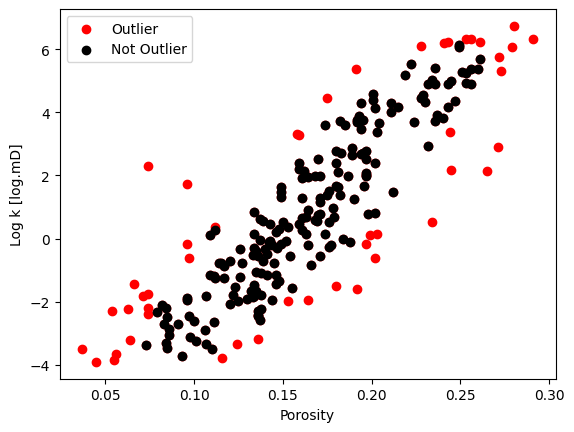

In [14]:
plt.scatter(df_selected['porosity'], df_selected['permv_klinken'],
            c='r', label='Outlier')
plt.scatter(dfx['porosity'], dfx['permv_klinken'],
            c='k', label='Not Outlier')
plt.xlabel('Porosity')
plt.ylabel('Log k [log.mD]')
plt.legend()

In [15]:
# Apply the outlier index to the original dataframe
df_clean = df_well.loc[id_not_out,:]

df_clean

,Well Name,Measured Depth,porosity,Sw,permh_klinken,permv_klinken,grain_density,clean lithology,rounding,sorting,cement,sed structures,log_kv,log_kh
0,34_8-4S,3005.50,0.232,0.362,44.400,18.900,2.67,Sandstone,subangular,well sorted,well cemented,Unidentified,1.276462,1.647383
1,34_8-4S,3006.50,0.185,0.299,1.110,36.500,2.79,Sandstone,subangular,well sorted,well cemented,Unidentified,1.562293,0.045323
2,34_8-4S,3007.50,0.144,0.403,0.464,0.141,2.77,Sandstone,subangular,well sorted,well cemented,Unidentified,-0.850781,-0.333482
5,34_8-4S,3010.50,0.245,0.258,26.000,147.000,2.62,Sandstone,subangular,well sorted,well cemented,Unidentified,2.167317,1.414973
7,34_8-4S,3012.50,0.211,0.328,47.400,73.200,2.67,Sandstone,subangular,well sorted,well cemented,Unidentified,1.864511,1.675778
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233,34_8-4S,4066.50,0.137,0.691,0.260,0.966,2.66,Sandstone,subangular,well sorted,well cemented,Unidentified,-0.015023,-0.585027
234,34_8-4S,4067.50,0.161,0.638,2.370,1.920,2.64,Sandstone,subangular,well sorted,well cemented,Unidentified,0.283301,0.374748
235,34_8-4S,4068.50,0.163,0.639,2.150,1.980,2.64,Sandstone,subangular,well sorted,well cemented,Unidentified,0.296665,0.332438
236,34_8-4S,4069.45,0.164,0.643,1.760,2.430,2.65,Sandstone,subangular,well sorted,well cemented,Unidentified,0.385606,0.245513


## Saturation modelling

In [ ]:
def timur(poro, swi, a, b, c):
  return (a * poro**b / swi)**c

def logk(poro, swirr, a, b, c):
  return np.exp(1)**((a* np.log(poro)) + (b * np.log(swirr)) + c)

In [ ]:
from scipy.optimize import curve_fit

[swi, a, b, c], _ = curve_fit(timur, df_clean['porosity'], df_clean['permv_klinken'])

print(swi, a, b, c)

0.12139058075099064 7.89222763095127 2.017592321564752 3.8134536870584803


(np.float64(6.190417643832269e-10), 10000.0)

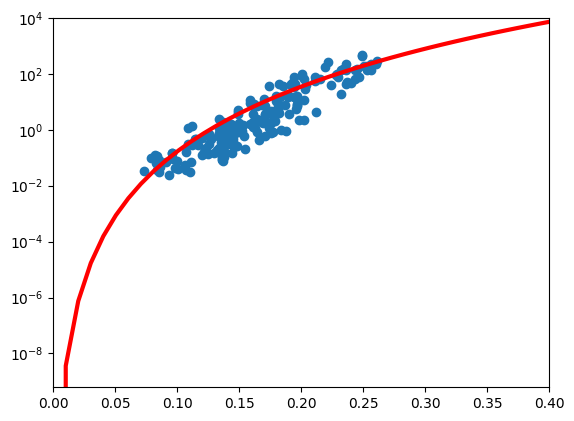

In [ ]:
poro = np.linspace(0, 1, 100)
k = timur(poro, swi, a, b, c)
plt.plot(poro, k, c='r', lw=3, label=f'Swirr={swi:.3f}\na={a:.3f}\nb={b:.3f}\nc={c:.3f}')
plt.scatter(df_clean['porosity'], df_clean['permv_klinken'])
plt.yscale('log')

plt.xlim(0,0.4)
plt.ylim(ymax=1e4)

In [ ]:
# wells = data['Well Name'].unique()

# well_list = []
# num_data_list = []
# r2_list = []

# for w in wells:
#   df_well = data[data['Well Name']==w].reset_index(drop=True)

#   if len(df_well)<5:
#     pass
#   else:
#     df_selected = df_well[['porosity', 'permv_klinken']]
#     df_selected['permv_klinken'] = np.log(df_selected['permv_klinken'].values)

#     # remove outlier
#     # Define contamination
#     contamination = 0.2

#     # Outlier detection
#     model = EllipticEnvelope(contamination=contamination)
#     out = model.fit_predict(df_selected)

#     # Print which index is not outlier
#     id_not_out = list(np.where(out==1)[0])

#     # Filter dataframe which is not outlier
#     dfx = df_selected.loc[id_not_out,:]

#     # Apply the outlier index to the original dataframe
#     df_clean = df_well.loc[id_not_out,:]

#     # Curve fits
#     [swi, a, b, c], _ = curve_fit(timur, df_clean['porosity'], df_clean['permv_klinken'])

#     y_pred = timur(df_clean['porosity'], swi, a, b, c)
#     y_test = df_clean['permv_klinken']

#     well_list.append(w)
#     num_data_list.append(len(y_pred))
#     r2_list.append(r2_score(y_test, y_pred))



In [ ]:
# result = pd.DataFrame({'well': well_list, 'num_data': num_data_list, 'r2': r2_list})

# result.sort_values(by='num_data', ascending=False).head(30)

## Visualization

In [ ]:
data.columns

Index(['Well Name', 'Measured Depth', 'porosity', 'Sw', 'permh_klinken',
       'permv_klinken', 'grain_density', 'clean lithology', 'rounding',
       'sorting', 'cement', 'sed structures', 'log_kv', 'log_kh'],
      dtype='object')

In [ ]:
import plotly.express as px

In [ ]:
fig = px.scatter(data, x='porosity', y='permh_klinken', color='sorting',
                 log_y=True, range_x=(0,.45), width=1000, height=700) # cement height 1000, sed struct 1500

fig.show()

In [ ]:
data.rounding.unique()

array(['subangular', 'subrounded', 'angular', 'angular subrounded',
       'angular subangular', 'subangular subrounded', 'Unidentified',
       'subrounded subangular', 'rounded', 'subangular rounded'],
      dtype=object)

In [ ]:
# make filter on roundness
data_round_filtered = data[(data.rounding=='subrounded') |
                         (data.rounding=='angular') |
                         (data.rounding=='subangular subrounded')]

fig = px.scatter(data_round_filtered, x='porosity', y='permh_klinken', color='rounding',
                 log_y=True, range_x=(0,.45), width=1000, height=700) # cement height 1000, sed struct 1500

fig.show()

In [ ]:
data.cement.unique()

array(['well cemented', 'cemented', 'fair cemented', 'very well cemented',
       'poorly cemented', 'very poorly cemented',
       'very well very well consolidated cemented', 'fair well cemented',
       'unconsolidated', 'consolidated',
       'unconsolidated very poorly cemented', 'cemented unconsolidated',
       'very poorly cemented unconsolidated',
       'unconsolidated well cemented', 'Unidentified',
       'cemented very well cemented', 'very well cemented fair cemented',
       'well cemented fair cemented', 'consolidated fair cemented',
       'well consolidated', 'well well cemented cemented',
       'fair consolidated'], dtype=object)

In [ ]:
# make filter on cementation
data_cem_filtered = data[(data.cement=='unconsolidated') |
                         (data.cement=='fair cemented') |
                         (data.cement=='very well cemented')]

fig = px.scatter(data_cem_filtered, x='porosity', y='permh_klinken', color='cement',
                 log_y=True, range_x=(0,.45), width=1000, height=700) # cement height 1000, sed struct 1500

fig.show()

In [ ]:
data.columns

Index(['Well Name', 'Measured Depth', 'porosity', 'Sw', 'permh_klinken',
       'permv_klinken', 'grain_density', 'clean lithology', 'rounding',
       'sorting', 'cement', 'sed structures', 'log_kv', 'log_kh'],
      dtype='object')

In [ ]:
data.cement.unique()

array(['well cemented', 'cemented', 'fair cemented', 'very well cemented',
       'poorly cemented', 'very poorly cemented',
       'very well very well consolidated cemented', 'fair well cemented',
       'unconsolidated', 'consolidated',
       'unconsolidated very poorly cemented', 'cemented unconsolidated',
       'very poorly cemented unconsolidated',
       'unconsolidated well cemented', 'Unidentified',
       'cemented very well cemented', 'very well cemented fair cemented',
       'well cemented fair cemented', 'consolidated fair cemented',
       'well consolidated', 'well well cemented cemented',
       'fair consolidated'], dtype=object)

<Axes: xlabel='porosity', ylabel='log_kh'>

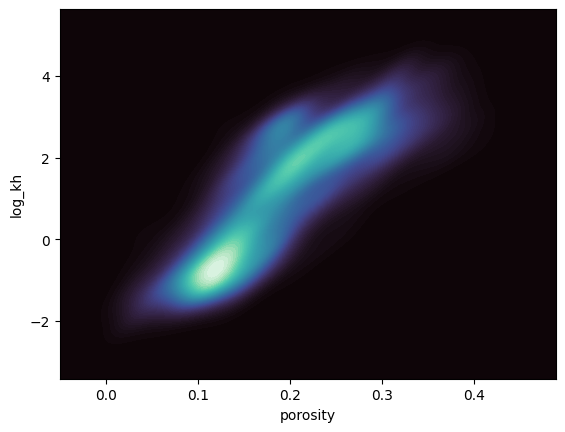

In [ ]:
import seaborn as sns

sns.kdeplot(
    data=data, x='porosity', y='log_kh',
    fill=True, thresh=0, levels=100, cmap="mako",
)

<Axes: xlabel='porosity', ylabel='log_kh'>

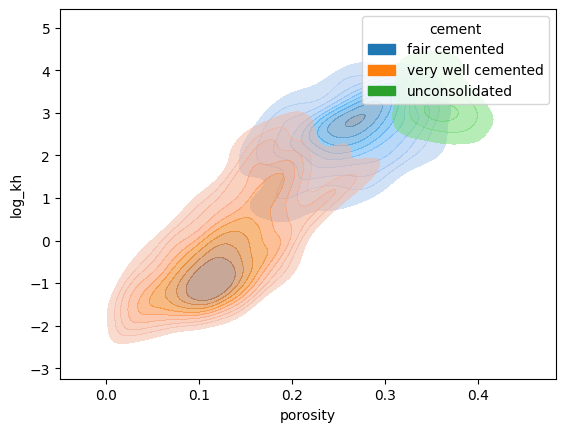

In [ ]:
sns.kdeplot(data=data_cem_filtered, x='porosity', y='log_kh',
            hue='cement', fill=True,
            thresh=0.1, alpha=0.5)

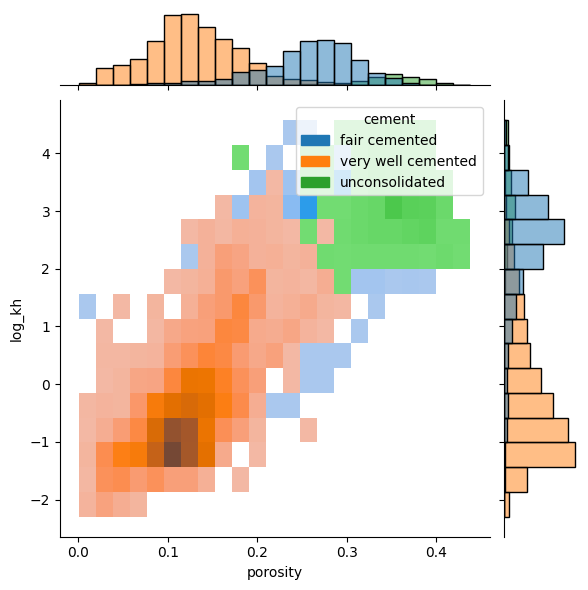

In [ ]:
sns.jointplot(data=data_cem_filtered, x='porosity', y='log_kh',
              hue="cement", kind="hist")

## Machine learning

In [16]:
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Dense

In [26]:
# Define columns that not used
col_drop = ['Well Name', 'Measured Depth', 'sed structures', 'permh_klinken', 'permv_klinken', 'Sw']

# drop columns
data_train = data.drop(columns=col_drop)

data_train

,porosity,grain_density,clean lithology,rounding,sorting,cement,log_kv,log_kh
0,0.0360,2.63,Sandstone,subangular,well sorted,well cemented,0.468347,-0.016825
1,0.0768,2.63,Sandstone,subangular,well sorted,well cemented,-0.754487,-0.978811
2,0.1040,2.63,Sandstone,subangular,well sorted,well cemented,-1.251812,-0.906578
3,0.1510,2.63,Sandstone,subangular,well sorted,well cemented,-0.823909,-0.774691
4,0.0950,2.65,Sandstone,subangular,well sorted,well cemented,-1.309804,-1.301030
...,...,...,...,...,...,...,...,...
9223,0.1820,2.65,Sandstone,Unidentified,well sorted,well cemented,0.146128,0.676694
9224,0.1860,2.65,Sandstone,Unidentified,well sorted,well cemented,0.396199,1.264818
9225,0.1680,2.62,Sandstone,Unidentified,well sorted,well cemented,0.324282,0.459392
9226,0.1560,2.60,Sandstone,Unidentified,well sorted,well cemented,-0.079355,-0.081970


In [44]:
# Prepare features and target
X = data_train.iloc[:,:-2]
y = data_train.iloc[:,-2:]

y

,log_kv,log_kh
0,0.468347,-0.016825
1,-0.754487,-0.978811
2,-1.251812,-0.906578
3,-0.823909,-0.774691
4,-1.309804,-1.301030
...,...,...
9223,0.146128,0.676694
9224,0.396199,1.264818
9225,0.324282,0.459392
9226,-0.079355,-0.081970


In [45]:
# Define columns that need to be encoded
categ = ['clean lithology', 'rounding', 'sorting', 'cement']

# Define encoder
le = LabelEncoder()

# run encoding
X[categ] = X[categ].apply(le.fit_transform)

X

,porosity,grain_density,clean lithology,rounding,sorting,cement
0,0.0360,2.63,0,5,16,18
1,0.0768,2.63,0,5,16,18
2,0.1040,2.63,0,5,16,18
3,0.1510,2.63,0,5,16,18
4,0.0950,2.65,0,5,16,18
...,...,...,...,...,...,...
9223,0.1820,2.65,0,0,16,18
9224,0.1860,2.65,0,0,16,18
9225,0.1680,2.62,0,0,16,18
9226,0.1560,2.60,0,0,16,18


In [46]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = \
train_test_split(X, y, test_size=0.2, random_state=42)

In [47]:
X_train

,porosity,grain_density,clean lithology,rounding,sorting,cement
5821,0.0830,2.65,0,5,6,15
1323,0.1890,2.64,0,5,16,18
5563,0.0430,2.83,0,8,16,1
4840,0.2440,2.65,0,5,16,18
4514,0.1797,2.61,0,5,16,18
...,...,...,...,...,...,...
5734,0.1100,2.67,0,5,16,15
5191,0.1630,2.71,0,5,16,18
5390,0.2610,2.66,0,5,16,18
860,0.1550,2.67,0,5,16,18


In [48]:
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Dropout
from keras.callbacks import ModelCheckpoint
from keras.optimizers import SGD, Adam, RMSprop

model = Sequential([
          Dense(500, activation='relu',kernel_initializer='normal', input_shape=(6,)),
          Dropout(0.1), # avoid overfitting
          Dense(400, kernel_initializer='normal', activation='relu' ),
          Dropout(0.1),
          Dense(300, kernel_initializer='normal', activation='relu' ),
          Dropout(0.1),
          Dense(200, kernel_initializer='normal', activation='relu' ),
          Dropout(0.1),
          Dense(100, kernel_initializer='normal', activation='relu' ),
          Dropout(0.1),
          Dense(50, kernel_initializer='normal', activation='relu' ),
          Dropout(0.1),
          Dense(2, kernel_initializer='normal')]
)

# Define optimizer and loss function then compile
opt = 'adam'
model.compile(optimizer=opt, loss='mean_squared_error')

# Record training
model_checkpoint = ModelCheckpoint('best_model.keras', monitor='val_loss', mode='min',
                                   save_best_only=True, verbose=1)

# Train model
history = model.fit(X_train, y_train, validation_split=0.3, batch_size=64,
                    epochs=100, callbacks=[model_checkpoint])

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


78/81 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 2.5616
Epoch 1: val_loss improved from inf to 2.05879, saving model to best_model.keras
81/81 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 2.5497 - val_loss: 2.0588
Epoch 2/100
80/81 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 2.0140
Epoch 2: val_loss did not improve from 2.05879
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 2.0135 - val_loss: 2.0921
Epoch 3/100
78/81 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 1.9217
Epoch 3: val_loss improved from 2.05879 to 1.76134, saving model to best_model.keras
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 1.9191 - val_loss: 1.7613
Epoch 4/100
78/81 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 1.7270
Epoch 4: val_loss improved from 1.76134 to 1.60007, saving model to best_model.keras
81/81 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 1.7271 - val_loss: 1.6001
Epoch 5/100
79/81 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 1.5962
Epoch 5: val_loss improved from 1.60007 to 1.34210, saving model to best_model.kera

In [53]:
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_56 (Dense)                │ (None, 500)            │         3,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_48 (Dropout)            │ (None, 500)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_57 (Dense)                │ (None, 400)            │       200,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_49 (Dropout)            │ (None, 400)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_58 (Dense)                │ (None, 300)            │       120,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_50 (Dropout)            │ (None, 300)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_59 (Dense)                │ (None, 200)            │        60,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_51 (Dropout)            │ (None, 200)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_60 (Dense)                │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_52 (Dropout)            │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_61 (Dense)                │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_53 (Dropout)            │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_62 (Dense)                │ (None, 2)              │           102 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,228,958 (4.69 MB)

 Trainable params: 409,652 (1.56 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 819,306 (3.13 MB)

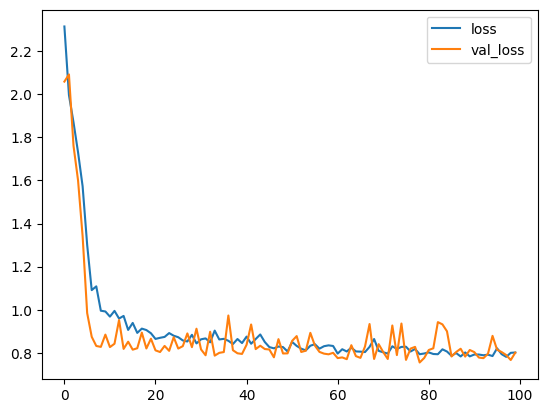

In [49]:
def plot_model_history(history):
    fig, axes = plt.subplots(nrows=1, ncols=1)
    axes.plot(history.history['loss'])
    axes.plot(history.history['val_loss'])
    axes.legend(['loss', 'val_loss'])

plot_model_history(history)

In [52]:
model.save('model_nn_petrophysics.keras')

In [59]:
y_pred = model.predict(X_test)

y_pred

58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


array([[ 1.3913434 ,  1.8042915 ],
       [-0.27570492,  0.04688615],
       [ 1.2559454 ,  1.6777759 ],
       ...,
       [ 2.920105  ,  3.1557055 ],
       [ 2.8067274 ,  3.0600953 ],
       [ 1.409249  ,  1.8112726 ]], dtype=float32)

In [63]:
y_test

,log_kv,log_kh
1183,1.627366,2.127105
1038,-1.431798,-1.070581
9217,0.924796,1.997823
908,0.017033,0.330414
8492,0.897627,1.149219
...,...,...
1530,1.309630,1.276462
5961,-0.148130,-0.123205
7807,3.752816,3.911690
7826,2.790285,3.100371


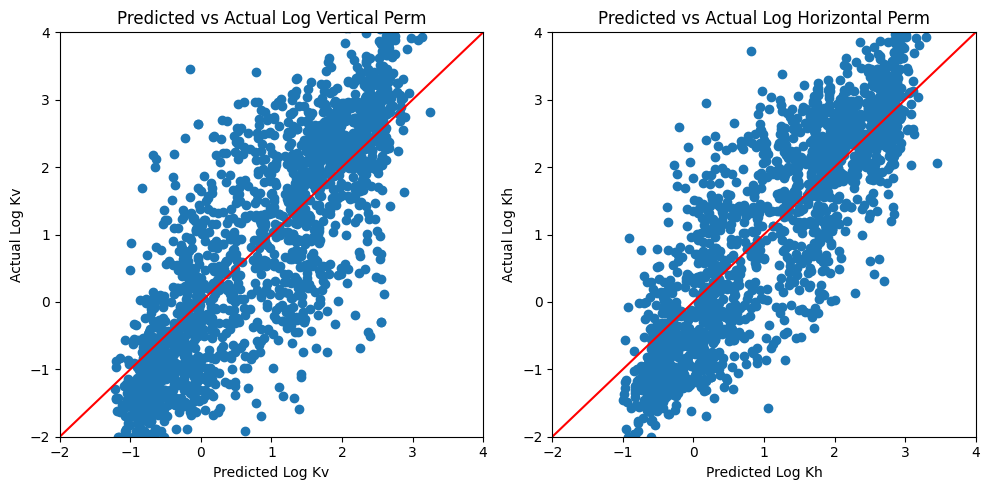

In [70]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.scatter(y_pred[:,0], y_test.iloc[:,0])
plt.plot([-2,4],[-2,4], color='r')
plt.xlim(-2, 4)
plt.ylim(-2, 4)
plt.xlabel('Predicted Log Kv')
plt.ylabel('Actual Log Kv')
plt.title('Predicted vs Actual Log Vertical Perm')

plt.subplot(1,2,2)
plt.scatter(y_pred[:,1], y_test.iloc[:,1])
plt.plot([-2,4],[-2,4], color='r')
plt.xlim(-2, 4)
plt.ylim(-2, 4)
plt.xlabel('Predicted Log Kh')
plt.ylabel('Actual Log Kh')
plt.title('Predicted vs Actual Log Horizontal Perm')

plt.tight_layout()

In [55]:
# url = "https://zenodo.org/record/4419060/files/RealPore%20Por%20Perm%20Lithology%20data%201240%20Wells%20Norway%20public.xlsx?download=1"

# # Loading takes 2-3 mins
# data = pd.read_excel(url, sheet_name=0)

# data.head(3)

In [56]:
# def clean_geoprovider_data(data, column_list = ["clean lithology", "rounding", "sorting", "cement", "sed structures"]):
#   """
#   Clean Geoprovider data

#   Arguments:

#     data (dataframe): Geoprovider dataframe
#     column_list (list): List of columns to be cleaned. Default is ["clean lithology", "rounding", "sorting", "cement", "sed structures"]

#   Returns:
#     Cleaned dataframe
#   """

#   # Change NaN values in the above column names to "Unidentified"
#   data[column_list] = data[column_list].fillna("Unidentified")

#   # Equalize all duplicated values
#   data["clean lithology"] = data["clean lithology"].replace({"Limestone ": "Limestone", " Limestone": "Limestone",
#                                                             "Sandstone ": "Sandstone", "sandstone": "Sandstone",
#                                                             "Silstone": "Siltstone", "Siltstone)": "Siltstone",
#                                                             "siltstone": "Siltstone", "rock quartz": "quartz"})

#   data["rounding"] = data["rounding"].replace({"subangular ": "subangular"})

#   # Rename column names of permeability, porosity, grain density
#   data = data.rename(columns={"Klinkenberg corrected gas perm. Hor.": "permh_klinken",
#                               "Klinkenberg corrected gas perm. Vert.": "permv_klinken",
#                               "porosity best of available": "porosity",
#                               "gain density gr/cm3": "grain_density",
#                               "Pore Sturation Water Sw  Sw. S wtr. WTR. ": "Sw"})

#   # Convert dtype=object in above 3 columns to float, coercing strings e.g. "NMP" to NaN
#   data["permh_klinken"] = pd.to_numeric(data["permh_klinken"], errors="coerce")
#   data["permv_klinken"] = pd.to_numeric(data["permv_klinken"], errors="coerce")
#   data["porosity"] = pd.to_numeric(data["porosity"], errors="coerce")
#   data["Sw"] = pd.to_numeric(data["Sw"], errors="coerce")
#   data["grain_density"] = pd.to_numeric(data["grain_density"], errors="coerce")

#   # Convert porosity and Sw to 0.
#   data["porosity"] = data["porosity"] / 100
#   data["Sw"] = data["Sw"] / 100

#   # Select subset of dataframe
#   data_select = data[["Well Name", "Measured Depth", "porosity", "Sw", "permh_klinken",
#                       "permv_klinken", "grain_density", "clean lithology", "rounding",
#                       "sorting","cement", "sed structures"]].copy()

#   # Drop NaN from porosity, permeability, grain_density
#   data_select = data_select.dropna(subset=["porosity", "permh_klinken", "permv_klinken", "grain_density"])

#   # Drop NaN values and finalize
#   data_select = data_select.dropna().reset_index(drop=True)

#   # Log convert and calculate kv kh ratio
#   data_select['log_kv'] = np.log10(data_select['permv_klinken'])
#   data_select['log_kh'] = np.log10(data_select['permh_klinken'])

#   return data_select

In [57]:
# data_select = clean_geoprovider_data(data)

# data_select.head()

In [58]:
# # Carbonate
# lst = data[data['clean lithology']=='Limestone']

# # Sandstone
# sst = data_select[data_select['clean lithology']=='Sandstone']

# sst